In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

eda_raw = pd.read_csv("../../data/raw/train.csv")
eda_raw = eda_raw.drop([61, 829])
eda_data = pd.read_csv("../../data/processed/eda_allData_tidy.csv")

In [2]:
eda_data.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Female,Male,Age_was_missing,Age,C,Q,S
0,1,0,3,1,0,7.2500,0.0,1.0,False,22.0,0.0,0.0,1.0
1,2,1,1,1,0,71.2833,1.0,0.0,False,38.0,1.0,0.0,0.0
2,3,1,3,0,0,7.9250,1.0,0.0,False,26.0,0.0,0.0,1.0
3,4,1,1,1,0,53.1000,1.0,0.0,False,35.0,0.0,0.0,1.0
4,5,0,3,0,0,8.0500,0.0,1.0,False,35.0,0.0,0.0,1.0


In [3]:
eda_data.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Female,Male,Age,C,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.524184,0.382452,32.096681,0.350956,0.649044,29.653446,0.188976,0.086614,0.724409
std,256.998173,0.486260,0.834700,1.103705,0.806761,49.697504,0.477538,0.477538,12.968366,0.391710,0.281427,0.447063
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,0.000000,7.895800,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200,0.000000,1.000000,29.699118,0.000000,0.000000,1.000000
75%,668.000000,1.000000,3.000000,1.000000,0.000000,31.000000,1.000000,1.000000,35.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200,1.000000,1.000000,80.000000,1.000000,1.000000,1.000000


In [4]:
# find missing values in columns
cols_missing_values = [col for col in eda_data.columns if eda_data[col].isnull().any()]

print("Columns with missing values:")
print(cols_missing_values)

Columns with missing values:
[]


In [5]:
# find categorical values
s = (eda_data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
[]


In [6]:
# Pairwise correlation of columns:
eda_data.corr()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Female,Male,Age_was_missing,Age,C,Q,S
PassengerId,1.000000,-0.005028,-0.035330,-0.057686,-0.001657,0.012703,-0.043136,0.043136,-0.020223,0.030300,-0.001208,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,-0.034040,0.083151,0.255290,0.541585,-0.541585,-0.090967,-0.074673,0.169966,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,0.081656,0.016824,-0.548193,-0.127741,0.127741,0.171701,-0.327954,-0.245733,0.220558,0.076466
SibSp,-0.057686,-0.034040,0.081656,1.000000,0.414542,0.160887,0.116348,-0.116348,0.018436,-0.231875,-0.060074,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,0.414542,1.000000,0.217532,0.247508,-0.247508,-0.124701,-0.178232,-0.011588,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.160887,0.217532,1.000000,0.179958,-0.179958,-0.099761,0.088604,0.270731,-0.116684,-0.163758
Female,-0.043136,0.541585,-0.127741,0.116348,0.247508,0.179958,1.000000,-1.000000,-0.053823,-0.089434,0.084520,0.075217,-0.121405
Male,0.043136,-0.541585,0.127741,-0.116348,-0.247508,-0.179958,-1.000000,1.000000,0.053823,0.089434,-0.084520,-0.075217,0.121405
Age_was_missing,-0.020223,-0.090967,0.171701,0.018436,-0.124701,-0.099761,-0.053823,0.053823,1.000000,0.001757,0.032747,0.337199,-0.240960
Age,0.030300,-0.074673,-0.327954,-0.231875,-0.178232,0.088604,-0.089434,0.089434,0.001757,1.000000,0.033853,-0.012823,-0.021589


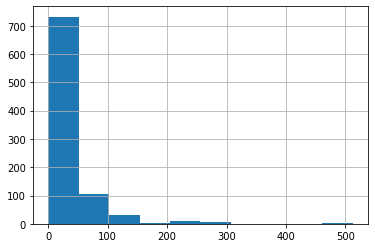

In [15]:
# Histogram:
eda_data.Fare.hist()

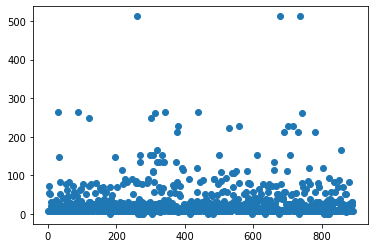

In [23]:
# Scatterplot of tweo features
import matplotlib.pyplot as plt
x = eda_raw.PassengerId
y = eda_raw.Fare

plt.scatter(x,y)